# 1)

Régression: indice de Gini = calcul des variances?

# 2)

In [48]:
from sklearn import tree
import tptreesource as tpsource
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
# résultats non classifiés
n1 = 114
n2 = 114
n3 = 114
n4 = 114
data = tpsource.rand_checkers(n1=n1, n2=n2, n3=n3, n4=n4)

In [3]:
data

array([[-0.73077977, -1.49719204,  1.        ],
       [-0.57408524, -0.46535165,  0.        ],
       [ 1.0072024 ,  0.6045565 ,  1.        ],
       ...,
       [-1.75483752,  1.41060698,  1.        ],
       [ 0.53504431,  0.83814137,  0.        ],
       [ 1.83728829,  0.9430836 ,  1.        ]])

Créez deux courbes qui donnent le pourcentage d’erreurs commises en fonction de la
profondeur maximale de l’arbre (une courbe pour Gini, une courbe pour l’entropie)

In [4]:
X = data[:,0:2]

In [5]:
Y = data[:,2]

[[0.27232143 0.31026786 0.35491071 0.39508929 0.43303571 0.51339286
  0.64285714 0.765625   0.88169643 0.95535714 0.97321429 0.98214286
  0.99107143 0.99330357 0.99776786 0.99776786 1.         1.
  1.         1.        ]
 [0.265625   0.296875   0.31473214 0.32589286 0.359375   0.39955357
  0.56473214 0.61830357 0.88392857 0.9375     0.95982143 0.97544643
  0.98883929 0.99553571 1.         1.         1.         1.
  1.         1.        ]]


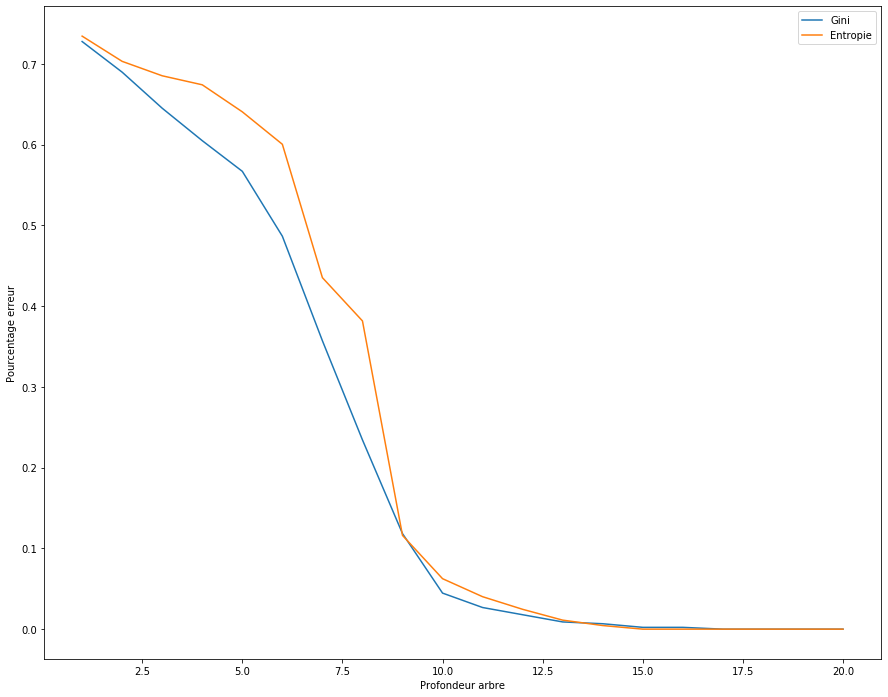

In [9]:
prof_max = 20
scores = np.zeros((2,prof_max))
plt.figure(figsize=(15, 12))

for j, crit in enumerate(['gini', 'entropy'], 0):
    for i in range(prof_max):
        dt = tree.DecisionTreeClassifier(criterion=crit, max_depth=i+1)
        dt.fit(X, Y)
        scores[j, i] = dt.score(X, Y) # Score should be done on test data????
        
print(scores)

plt.plot(np.arange(prof_max) + 1, 1-scores[0,], label="Gini") 
plt.plot(np.arange(prof_max) + 1, 1-scores[1,], label="Entropie")
plt.xlabel('Profondeur arbre')
plt.ylabel('Pourcentage erreur')
plt.legend()
plt.show()

# 3)

Afficher la règle de classification obtenues en utilisant la profondeur qui minimise le pourcentage
d’erreurs obtenues avec l’entropie et avec l’indice de Gini (utiliser si besoin les fonctions plot_2d
et frontiere du fichier source).

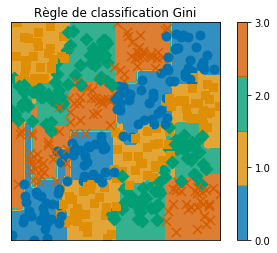

In [10]:
dt1 = tree.DecisionTreeClassifier(criterion='gini', max_depth=np.argmax(scores[0,:])+1)
dt1.fit(X, Y)

tpsource.frontiere_new(lambda x: dt1.predict(x.reshape((1, -1))), X, Y)
plt.title('Règle de classification Gini')
plt.show()

On en déduit que les 4 classes sont bien déterminées grâce à la règle de classification.

# 4)

Exporter des graphiques des arbres obtenu à la question précédente en format pdf. On pourra par
exemple utiliser la fonction export_graphviz du module tree.

In [11]:
tree.export_graphviz(dt1, out_file="TreeTP2.dot", filled=True)
os.system("dot -Tpdf TreeTP2.dot -o TreeTP2.pdf")

0

# 5)

In [12]:
# résultats non classifiés
n1 = 40
n2 = 40
n3 = 40
n4 = 40
data_2 = tpsource.rand_checkers(n1=n1, n2=n2, n3=n3, n4=n4)

In [13]:
X_test=data_2[:,0:2]
Y_test=data_2[:,2]

In [17]:
data_2.shape

(160, 3)

In [20]:
Y_test

array([3., 3., 0., 1., 2., 1., 3., 1., 2., 1., 2., 1., 0., 2., 3., 0., 0.,
       2., 1., 1., 2., 3., 0., 0., 3., 0., 0., 0., 3., 2., 1., 1., 2., 3.,
       2., 3., 0., 2., 3., 2., 3., 0., 1., 2., 1., 3., 0., 1., 2., 2., 2.,
       0., 1., 0., 2., 0., 0., 2., 1., 1., 2., 3., 3., 1., 1., 2., 3., 3.,
       0., 0., 3., 3., 1., 3., 1., 3., 0., 1., 3., 0., 2., 1., 0., 3., 3.,
       3., 0., 0., 1., 3., 2., 2., 3., 3., 0., 2., 0., 1., 1., 1., 2., 3.,
       1., 1., 0., 1., 1., 2., 0., 1., 3., 3., 2., 0., 1., 3., 3., 1., 0.,
       2., 0., 0., 2., 1., 0., 2., 1., 2., 2., 1., 2., 0., 1., 3., 3., 0.,
       3., 2., 0., 3., 2., 3., 2., 2., 0., 3., 1., 2., 2., 2., 0., 0., 2.,
       1., 0., 1., 3., 3., 0., 1.])

[[0.25625 0.30625 0.28125 0.35625 0.4     0.48125 0.5875  0.71875 0.78125
  0.8125  0.8     0.80625 0.79375 0.7875  0.78125 0.7875  0.79375 0.7875
  0.7875  0.79375]
 [0.25625 0.3125  0.31875 0.35625 0.375   0.35625 0.5375  0.54375 0.725
  0.80625 0.76875 0.7875  0.775   0.76875 0.775   0.775   0.78125 0.78125
  0.775   0.7625 ]]


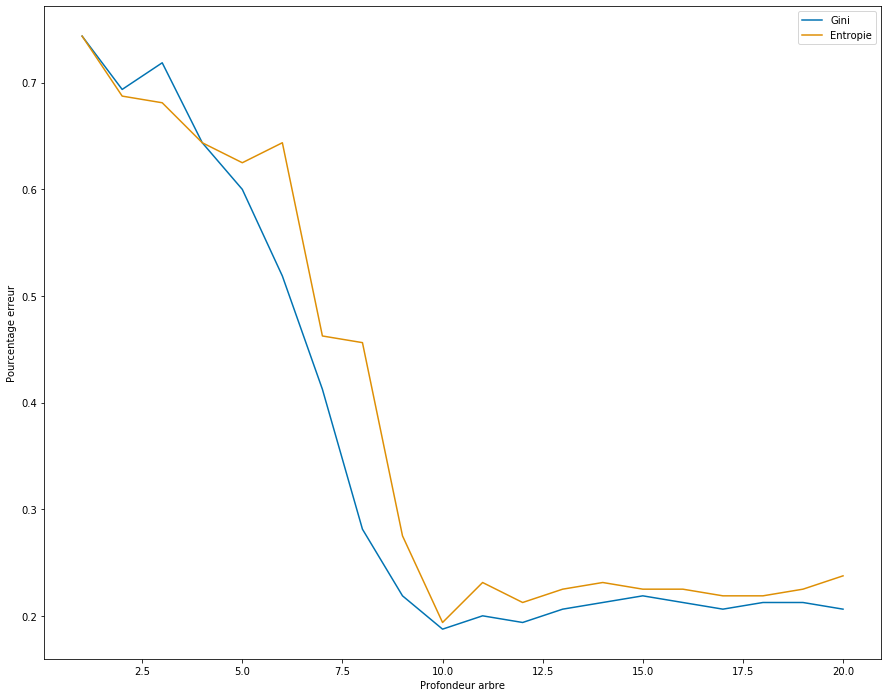

In [23]:
prof_max = 20
scores = np.zeros((2,prof_max))
plt.figure(figsize=(15, 12))

for j, crit in enumerate(['gini', 'entropy'], 0):
    for i in range(prof_max):
        dt = tree.DecisionTreeClassifier(criterion=crit, max_depth=i+1)
        dt.fit(X, Y)
        scores[j, i] = dt.score(X_test, Y_test)
        
print(scores)

plt.plot(np.arange(prof_max) + 1, 1-scores[0,], label="Gini") 
plt.plot(np.arange(prof_max) + 1, 1-scores[1,], label="Entropie")
plt.xlabel('Profondeur arbre')
plt.ylabel('Pourcentage erreur')
plt.legend()
plt.show()

On remarque qu'il y a un léger surrapprentissage à partir d'une profondeur à 10.

# 6)

In [55]:
digits = datasets.load_digits()

In [56]:
# X3=digits['data'][:,0:2]
# Y3=digits['target']

In [71]:
n_samples=len(digits.data)

In [76]:
X_train = digits.data[:n_samples // 2]
X_test = digits.data[:n_samples // 2:]
Y_train = digits.target[:n_samples // 2]
Y_test = digits.target[:n_samples // 2:]

[[0.20044543 0.31959911 0.46325167 0.6481069  0.76614699 0.85857461
  0.922049   0.96325167 0.98997773 0.99777283 1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.        ]
 [0.19933185 0.32739421 0.54565702 0.77839644 0.91202673 0.95768374
  0.98997773 1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.        ]]


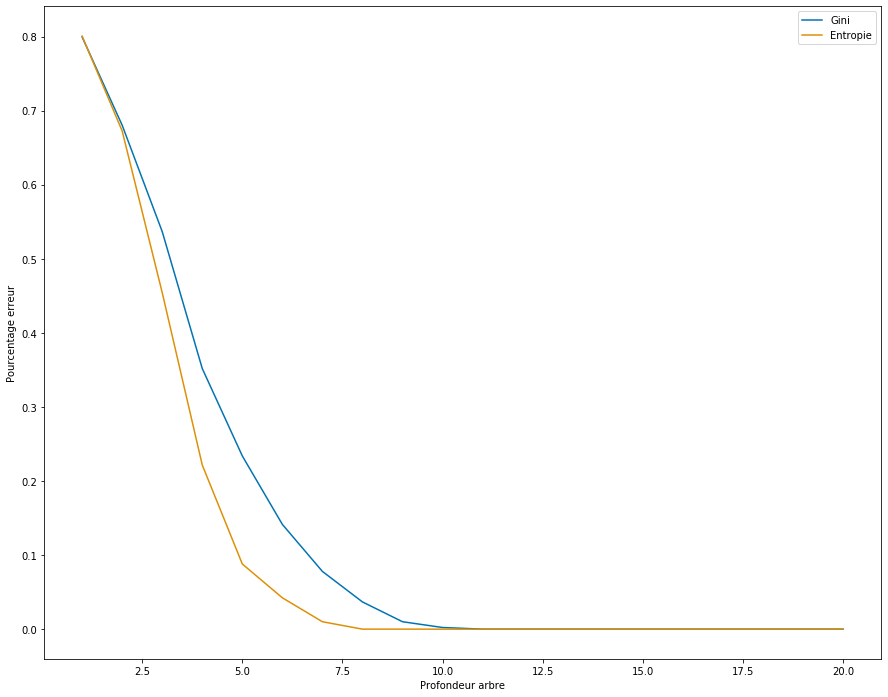

In [77]:
prof_max = 20
scores = np.zeros((2,prof_max))
plt.figure(figsize=(15, 12))

for j, crit in enumerate(['gini', 'entropy'], 0):
    for i in range(prof_max):
        dt = tree.DecisionTreeClassifier(criterion=crit, max_depth=i+1)
        dt.fit(X_train, Y_train)
        scores[j, i] = dt.score(X_test, Y_test)
        
print(scores)

plt.plot(np.arange(prof_max) + 1, 1-scores[0,], label="Gini") 
plt.plot(np.arange(prof_max) + 1, 1-scores[1,], label="Entropie")
plt.xlabel('Profondeur arbre')
plt.ylabel('Pourcentage erreur')
plt.legend()
plt.show()

On voit que le modèle apprend très bien.

# 7)